In [39]:
import pandas as pd
import csv
import os

### Create train, test csv file

In [2]:
train_path = '/home/guest/Desktop/Ponleur_KSL/Burapha-TH/train'
test_path = '/home/guest/Desktop/Ponleur_KSL/Burapha-TH/test'
train_csv = '/home/guest/Desktop/Ponleur_KSL/Burapha-TH/train.csv'
test_csv = '/home/guest/Desktop/Ponleur_KSL/Burapha-TH/test.csv'

In [3]:
df = pd.read_csv(train_csv,header=None)
class_dict = dict(zip(df[1],df[2]))
class_dict

{'class_id': 'class_name',
 '49': 'SARA AA',
 '34': 'RO RUA',
 '18': 'NO NEN',
 '64': 'MAI THO',
 '37': 'LU',
 '05': 'KHO RAKHANG',
 '46': 'PAIYANNOI',
 '35': 'RU',
 '17': 'THO PHUTHAO',
 '06': 'NGO NGU',
 '09': 'CHO CHANG',
 '19': 'DO DEK',
 '28': 'FO FA',
 '24': 'NO NU',
 '57': 'SARA E',
 '23': 'THO THONG',
 '42': 'HO HIP',
 '08': 'CHO CHING',
 '20': 'TO TAO',
 '16': 'THO NANGMONTHO',
 '44': 'O ANG',
 '31': 'PHO SAMPHAO',
 '02': 'KHO KHUAT',
 '07': 'CHO CHAN',
 '29': 'PHO PHAN',
 '39': 'SO SALA',
 '60': 'SARA AI MAIMUAN',
 '11': 'CHO CHOE',
 '55': 'SARA U',
 '50': 'SARA AM',
 '53': 'SARA UE',
 '40': 'SO RUSI',
 '59': 'SARA O',
 '22': 'THO THAHAN',
 '30': 'FO FAN',
 '27': 'PHO PHUNG',
 '13': 'DO CHADA',
 '67': 'THANTHAKHAT',
 '10': 'SO SO',
 '61': 'SARA AI MAIMALAI',
 '33': 'YO YAK',
 '32': 'MO MA',
 '54': 'SARA UEE',
 '41': 'SO SUA',
 '03': 'KHO KHWAI',
 '65': 'MAI TRI',
 '00': 'KO KAI',
 '25': 'BO BAIMAI',
 '52': 'SARA II',
 '66': 'MAI CHATTAWA',
 '45': 'HO NOKHUK',
 '47': 'SARA A',

In [3]:
all_data = pd.concat(map(pd.read_csv,[train_csv,test_csv]), ignore_index=True)
all_data

,file_path,class_id,class_name
0,49-210-D2-SARA AA/Set2_Jo_F1_T-0005_139.jpg,49,SARA AA
1,49-210-D2-SARA AA/Set2_F1_P-0033_136.jpg,49,SARA AA
2,49-210-D2-SARA AA/Set3_F1_P-0018_139.jpg,49,SARA AA
3,49-210-D2-SARA AA/Set3_F1_P-0008_139.jpg,49,SARA AA
4,49-210-D2-SARA AA/Set2_Jo_M1_T-0036_149.jpg,49,SARA AA
...,...,...,...
76922,51-212-D4-SARA I/Set5_M1_P-000001_120.jpg,51,SARA I
76923,51-212-D4-SARA I/Set5_F1_P-0056_126.jpg,51,SARA I
76924,51-212-D4-SARA I/Set5_F1_P-0173_126.jpg,51,SARA I
76925,51-212-D4-SARA I/Set5_F1_P-0111_126.jpg,51,SARA I


### Create CSV File

In [3]:
# file_path = []
# for folder in os.listdir(test_path):
#     counter = 0
#     for file in os.listdir(os.path.join(test_path,folder)):
#         # counter+=1
#         # print(os.path.join(folder,file))
#         file_path.append(os.path.join(folder,file))
#     # print(folder, counter)

In [4]:
# '49-210-D2-SARA AA/Set2_Jo_F1_T-0005_139.jpg'.split('-')[0] # 49
# '49-210-D2-SARA AA/Set2_Jo_F1_T-0005_139.jpg'.split('/')[0].split('-')[3] # SARA AA

In [5]:
# with open(test_csv, 'w') as f:
#     writer = csv.writer(f)
#     writer.writerow(['file_path', 'class_id','class_name'])
    
#     for filename in file_path:
#         class_id = filename.split('-')[0]
#         class_name = filename.split('/')[0].split('-')[3]
#         writer.writerow([filename, class_id, class_name])
# print('Finish')

### Image Visualization

In [4]:
import matplotlib.pyplot as plt
from PIL import Image

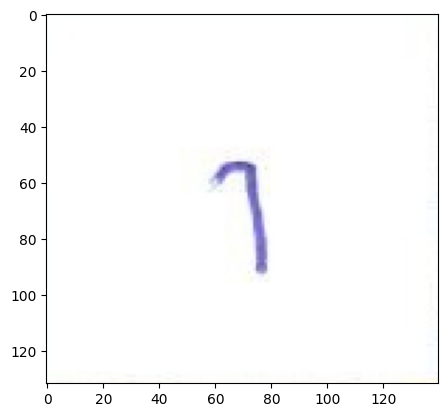

In [5]:
img = Image.open('/home/guest/Desktop/Ponleur_KSL/Burapha-TH/train/49-210-D2-SARA AA/Set2_Jo_F1_T-0005_139.jpg')
plt.imshow(img, cmap='gray')
plt.show()

### Create Dataset Class

In [6]:
import torch
from torchvision import transforms
from torch.utils.data import DataLoader, Dataset
# from torchvision.io import decode_image
from PIL import Image

In [7]:
class Burapha_TH(Dataset):
    def __init__(self, csv_file, root_dir, transform=None):
        self.data_frame = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.data_frame)

    def __getitem__(self, idx):
        img_name = os.path.join(self.root_dir, self.data_frame.iloc[idx, 0])
        # image = decode_image(img_name)
        image = Image.open(img_name)
        label = int(self.data_frame.iloc[idx, 1])

        if self.transform:
            image = self.transform(image)

        return image.float(), label

In [8]:
transforms = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),  # if your images are grayscale
    transforms.Resize((64, 64)),                # ResNet expects 224x224
    transforms.ToTensor(),
    # transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    transforms.Normalize(mean=[0.485,], std=[0.229,])
])


In [9]:
train_dataset = Burapha_TH(train_csv, train_path, transform=transforms)
test_dataset = Burapha_TH(test_csv, test_path, transform=transforms)

In [12]:
next(iter(train_dataset))[0].shape

torch.Size([1, 64, 64])

In [13]:
image_tensor = next(iter(test_dataset))[0]
image_tensor.shape

torch.Size([1, 64, 64])

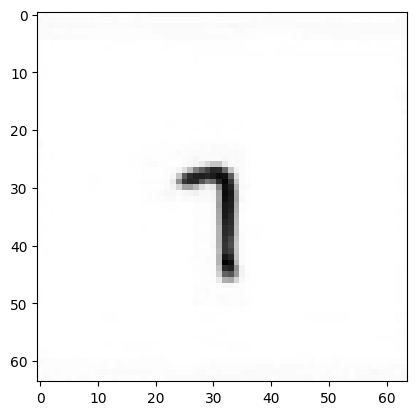

In [14]:
plt.imshow(image_tensor.permute(1,2,0), cmap='gray')

### DataLoader

In [10]:
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [11]:
next(iter(train_loader))[0].shape

torch.Size([128, 1, 64, 64])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0665298..2.2489083].


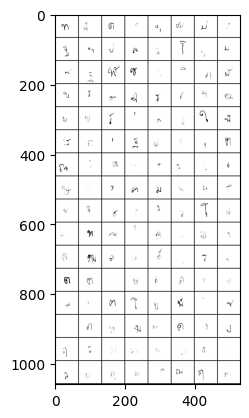

In [12]:
import torchvision
import numpy as np
def imshow(img):
    plt.imshow(img.permute(1, 2, 0), cmap='gray')
    plt.show()
dataiter = iter(train_loader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))

### Model Initialization

In [41]:
import torch
import torch.nn as nn 
import torch.nn.functional as F

### LeNet Model

In [42]:
class LeNet5(nn.Module):
    def __init__(self, num_classes=68):
        super(LeNet5, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
        
        self.fc1 = nn.Linear(16*13*13, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, num_classes)
    
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.avg_pool2d(x, 2)
        x = F.relu(self.conv2(x))
        x = F.avg_pool2d(x, 2)
        
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        
        return x

In [43]:
lenet_model = LeNet5()
# print(lenet_model(torch.randn(1,64,64)).shape)

### ResNet Model

In [44]:
resnet_model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet18', pretrained=True)
# resnet_model

Using cache found in /home/guest/.cache/torch/hub/pytorch_vision_v0.10.0


In [45]:
resnet_model.conv1 = nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
resnet_model.fc = nn.Linear(resnet_model.fc.in_features, out_features=68, bias=True)
resnet_model

ResNet(
  (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

### Define loss function, Optimizer

In [18]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
# model.to(device)
# resnet_model.to(device)

cuda


In [19]:
## Hyperparameters
lr = 1e-4
epochs = 10

In [20]:
loss_fn = nn.CrossEntropyLoss()
# optim = torch.optim.Adam(resnet_model.parameters(), lr)

### Define train and test function

In [55]:
def train(model, train_loader, loss_fn, optim, epochs, device):
    loss_values = []
    for epoch in range(epochs):
        for i, (images, labels) in enumerate(train_loader):
            images = images.to(device)
            labels = labels.to(device)

            # Forward pass
            outputs = model(images)
            loss = loss_fn(outputs, labels)

            # Backward and optimize
            optim.zero_grad()
            loss.backward()
            optim.step()
            
            if (i+1) % 10 == 0:
                print(f'Epoch [{epoch+1}/{epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}')
            loss_values.append(loss.item())
    return loss_values

In [43]:

def test(model, test_loader,  device):
    model.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        print(f'Accuracy of the model on the test images: {100 * correct / total:.2f}%')
    

In [75]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report
def evaluate_model(model, test_loader, device):
    model.eval()  # set model to eval mode
    model.to(device)

    y_pred = []
    y_true = []

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            _, preds = torch.max(outputs, 1)  # get predicted class

            y_pred.extend(preds.cpu().numpy())
            y_true.extend(labels.cpu().numpy())

    # Compute metrics
    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='weighted')  # use 'weighted' or 'micro' if preferred

    print(f"Accuracy: {acc:.4f}")
    print(f"F1 Score (macro): {f1:.4f}")
    
    return acc, f1
    # accuracy = accuracy_score(y_true, y_pred)
    # f1 = f1_score(y_true, y_pred, average='weighted')
    # recall = recall_score(y_true, y_pred, average='weighted')
    # precision = precision_score(y_true, y_pred, average='weighted')
    
    # # Generate classification report
    # report = classification_report(y_true, y_pred, target_names=class_dict, digits=4)
    
    # # Print the classification report
    # print("Classification Report:")
    # print(report)
    
    # # Return metrics as a dictionary
    # metrics = {
    #     'accuracy': accuracy,
    #     'f1_score': f1,
    #     'recall': recall,
    #     'precision': precision,
    #     'classification_report': report
    # }
    
    # return metrics


In [45]:
def loss_plot(history):
    plt.figure(figsize=(10,5))
    plt.plot(history, label='Training Loss')
    plt.xlabel('Step')
    plt.ylabel('Loss')
    plt.title('Training Loss over Time')
    plt.legend()
    plt.grid(True)
    plt.show()


In [46]:
# loss_plot(resnet_history)

In [47]:
# test(resnet_model, test_loader, device)

In [48]:
# evaluate_model(resnet_model, test_loader, device)

### Fine Tune VGG-Net-11 Model

In [51]:
vgg_model = torch.hub.load('pytorch/vision:v0.10.0','vgg11', pretrained=True)
# vgg_model

Using cache found in /home/guest/.cache/torch/hub/pytorch_vision_v0.10.0


In [52]:
vgg_model.features[0] = nn.Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
vgg_model.classifier[-1] = nn.Linear(in_features=4096, out_features=68, bias=True)
# vgg_model.to(device)
vgg_model

VGG(
  (features): Sequential(
    (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): ReLU(inplace=True)
    (13): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (14): ReLU(inplace=True)
    (15): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
 

In [53]:
# vgg_history = train(vgg_model, train_loader,loss_fn,torch.optim.AdamW(vgg_model.parameters(),lr),epochs=10, device=device)

### Custom CNN for 64x64

In [49]:
class HandwrittenTextCNN(nn.Module):
    def __init__(self):
        super(HandwrittenTextCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.bn3 = nn.BatchNorm2d(128)
        self.pool = nn.MaxPool2d(2, 2)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.2)
        
        self.fc1 = nn.Linear(8192,4096)
        self.fc2 = nn.Linear(4096, 2048)
        self.fc3 = nn.Linear(2048,1024)
        self.fc4 = nn.Linear(1024,68)

    def forward(self, x):
        x = self.pool(self.relu(self.bn1(self.conv1(x))))
        x = self.dropout(x)
        x = self.pool(self.relu(self.bn2(self.conv2(x))))
        x = self.dropout(x)
        x = self.pool(self.relu(self.bn3(self.conv3(x))))
        x = self.dropout(x)
        x = torch.flatten(x,1)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.fc4(x)
        return x  # Shape: [batch_size, 128, 8, 8]

In [50]:
custom_model = HandwrittenTextCNN()
# custom_feature = custom_model(dummy)
# print(custom_feature.shape)

### Training

In [61]:
num_epoch=20

In [62]:
%%time
custom_history = train(custom_model.to(device), train_loader, loss_fn, torch.optim.AdamW(custom_model.parameters(),lr),num_epoch, device)

Epoch [1/20], Step [10/495], Loss: 4.1935
Epoch [1/20], Step [20/495], Loss: 4.0121
Epoch [1/20], Step [30/495], Loss: 3.9412
Epoch [1/20], Step [40/495], Loss: 3.7696
Epoch [1/20], Step [50/495], Loss: 3.6215
Epoch [1/20], Step [60/495], Loss: 3.5583
Epoch [1/20], Step [70/495], Loss: 3.5216
Epoch [1/20], Step [80/495], Loss: 3.2659
Epoch [1/20], Step [90/495], Loss: 3.2767
Epoch [1/20], Step [100/495], Loss: 3.3113
Epoch [1/20], Step [110/495], Loss: 3.2091
Epoch [1/20], Step [120/495], Loss: 3.0760
Epoch [1/20], Step [130/495], Loss: 3.0264
Epoch [1/20], Step [140/495], Loss: 3.1133
Epoch [1/20], Step [150/495], Loss: 2.7966
Epoch [1/20], Step [160/495], Loss: 2.8685
Epoch [1/20], Step [170/495], Loss: 2.7200
Epoch [1/20], Step [180/495], Loss: 2.6662
Epoch [1/20], Step [190/495], Loss: 2.4607
Epoch [1/20], Step [200/495], Loss: 2.4282
Epoch [1/20], Step [210/495], Loss: 2.3810
Epoch [1/20], Step [220/495], Loss: 2.4851
Epoch [1/20], Step [230/495], Loss: 2.3317
Epoch [1/20], Step [

In [63]:
%%time
lenet_history = train(lenet_model.to(device), train_loader, loss_fn, torch.optim.AdamW(lenet_model.parameters(),lr),num_epoch, device)

Epoch [1/20], Step [10/495], Loss: 4.2063
Epoch [1/20], Step [20/495], Loss: 4.2222
Epoch [1/20], Step [30/495], Loss: 4.2234
Epoch [1/20], Step [40/495], Loss: 4.2131
Epoch [1/20], Step [50/495], Loss: 4.2208
Epoch [1/20], Step [60/495], Loss: 4.2214
Epoch [1/20], Step [70/495], Loss: 4.2239
Epoch [1/20], Step [80/495], Loss: 4.2175
Epoch [1/20], Step [90/495], Loss: 4.2156
Epoch [1/20], Step [100/495], Loss: 4.2166
Epoch [1/20], Step [110/495], Loss: 4.2146
Epoch [1/20], Step [120/495], Loss: 4.2132
Epoch [1/20], Step [130/495], Loss: 4.2216
Epoch [1/20], Step [140/495], Loss: 4.2192
Epoch [1/20], Step [150/495], Loss: 4.2126
Epoch [1/20], Step [160/495], Loss: 4.2091
Epoch [1/20], Step [170/495], Loss: 4.2143
Epoch [1/20], Step [180/495], Loss: 4.2100
Epoch [1/20], Step [190/495], Loss: 4.2153
Epoch [1/20], Step [200/495], Loss: 4.2086
Epoch [1/20], Step [210/495], Loss: 4.1981
Epoch [1/20], Step [220/495], Loss: 4.2035
Epoch [1/20], Step [230/495], Loss: 4.1846
Epoch [1/20], Step [

In [64]:
%%time
vgg_history = train(vgg_model.to(device), train_loader, loss_fn, torch.optim.AdamW(vgg_model.parameters(),lr),num_epoch, device)


Epoch [1/20], Step [10/495], Loss: 4.2113
Epoch [1/20], Step [20/495], Loss: 4.2026
Epoch [1/20], Step [30/495], Loss: 4.2369
Epoch [1/20], Step [40/495], Loss: 4.2227
Epoch [1/20], Step [50/495], Loss: 4.2229
Epoch [1/20], Step [60/495], Loss: 4.2212
Epoch [1/20], Step [70/495], Loss: 4.2195
Epoch [1/20], Step [80/495], Loss: 4.2212
Epoch [1/20], Step [90/495], Loss: 4.2155
Epoch [1/20], Step [100/495], Loss: 4.2242
Epoch [1/20], Step [110/495], Loss: 4.2160
Epoch [1/20], Step [120/495], Loss: 4.2093
Epoch [1/20], Step [130/495], Loss: 4.2158
Epoch [1/20], Step [140/495], Loss: 4.2060
Epoch [1/20], Step [150/495], Loss: 4.0560
Epoch [1/20], Step [160/495], Loss: 4.2415
Epoch [1/20], Step [170/495], Loss: 4.2195
Epoch [1/20], Step [180/495], Loss: 4.2296
Epoch [1/20], Step [190/495], Loss: 4.2171
Epoch [1/20], Step [200/495], Loss: 4.2247
Epoch [1/20], Step [210/495], Loss: 4.2200
Epoch [1/20], Step [220/495], Loss: 4.2202
Epoch [1/20], Step [230/495], Loss: 4.2081
Epoch [1/20], Step [

In [65]:
%%time
resnet_history = train(resnet_model.to(device), train_loader, loss_fn, torch.optim.AdamW(resnet_model.parameters(),lr),num_epoch, device)

Epoch [1/20], Step [10/495], Loss: 4.0805
Epoch [1/20], Step [20/495], Loss: 3.5869
Epoch [1/20], Step [30/495], Loss: 3.1950
Epoch [1/20], Step [40/495], Loss: 2.9690
Epoch [1/20], Step [50/495], Loss: 3.0435
Epoch [1/20], Step [60/495], Loss: 2.5786
Epoch [1/20], Step [70/495], Loss: 2.3773
Epoch [1/20], Step [80/495], Loss: 2.2662
Epoch [1/20], Step [90/495], Loss: 2.1751
Epoch [1/20], Step [100/495], Loss: 1.9237
Epoch [1/20], Step [110/495], Loss: 1.8018
Epoch [1/20], Step [120/495], Loss: 1.9864
Epoch [1/20], Step [130/495], Loss: 1.6718
Epoch [1/20], Step [140/495], Loss: 1.6401
Epoch [1/20], Step [150/495], Loss: 1.3983
Epoch [1/20], Step [160/495], Loss: 1.4601
Epoch [1/20], Step [170/495], Loss: 1.1851
Epoch [1/20], Step [180/495], Loss: 1.4164
Epoch [1/20], Step [190/495], Loss: 1.2617
Epoch [1/20], Step [200/495], Loss: 1.0895
Epoch [1/20], Step [210/495], Loss: 1.1928
Epoch [1/20], Step [220/495], Loss: 1.0638
Epoch [1/20], Step [230/495], Loss: 1.0605
Epoch [1/20], Step [

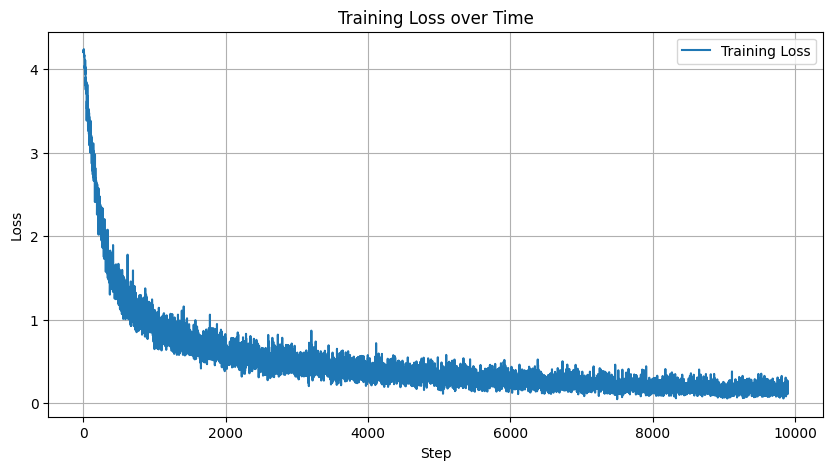

In [66]:
loss_plot(custom_history)

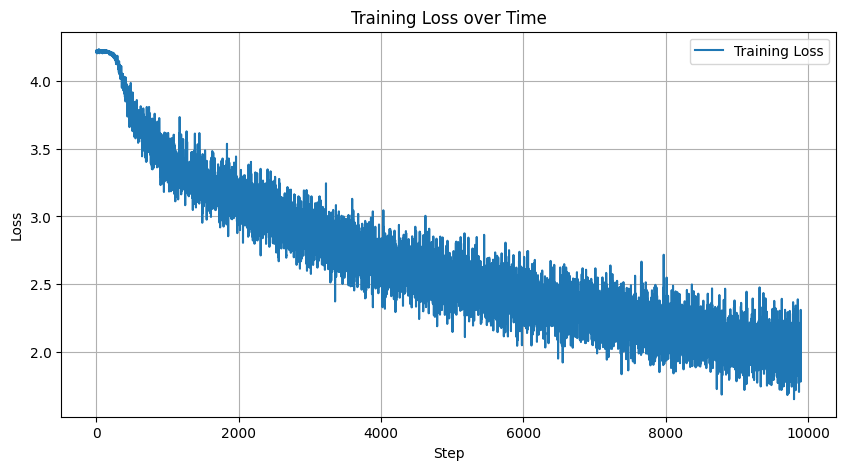

In [67]:
loss_plot(lenet_history)

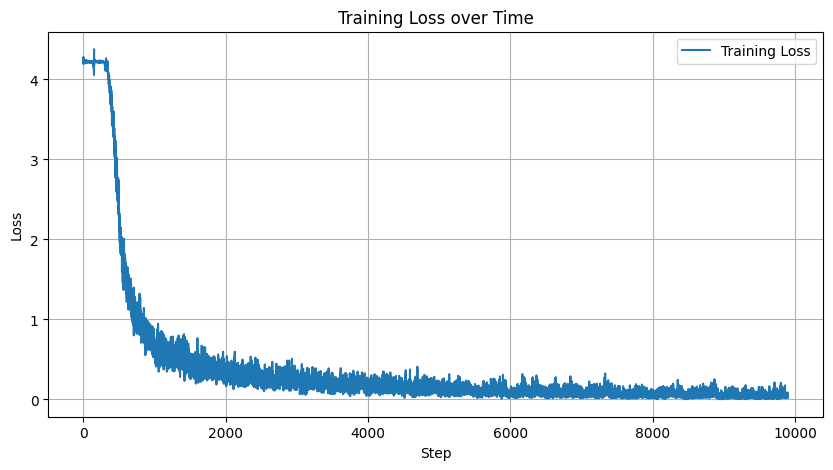

In [68]:
loss_plot(vgg_history)

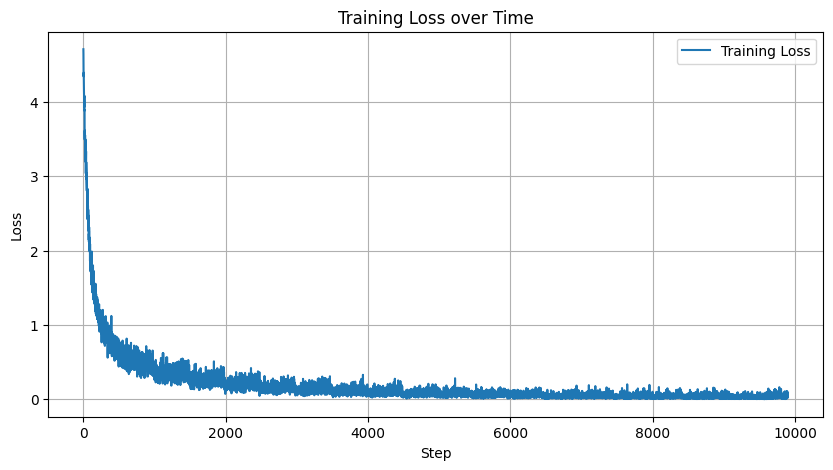

In [69]:
loss_plot(resnet_history)

In [76]:
%%time
evaluate_model(custom_model, test_loader,device)

Accuracy: 0.9053
F1 Score (macro): 0.9050
CPU times: user 2.63 s, sys: 53 ms, total: 2.68 s
Wall time: 2.69 s


(0.9052941176470588, 0.9049956585560839)

In [77]:
%%time
evaluate_model(lenet_model, test_loader,device)

Accuracy: 0.4621
F1 Score (macro): 0.4596
CPU times: user 3.17 s, sys: 43 ms, total: 3.21 s
Wall time: 3.21 s


(0.46205882352941174, 0.45962732972843745)

In [78]:
%%time
evaluate_model(vgg_model, test_loader,device)

Accuracy: 0.9351
F1 Score (macro): 0.9347
CPU times: user 4.97 s, sys: 47 ms, total: 5.02 s
Wall time: 5.01 s


(0.9351470588235294, 0.9347218479523088)

In [79]:
%%time
evaluate_model(resnet_model, test_loader,device)

Accuracy: 0.8977
F1 Score (macro): 0.8961
CPU times: user 3.47 s, sys: 38 ms, total: 3.5 s
Wall time: 3.5 s


(0.8977205882352941, 0.8960542994015275)

In [80]:
# torch.save(custom_model.state_dict(), 'grayscale_custom_CNN_state_dict.pt')
# torch.save(lenet_model.state_dict(), 'grayscale_lenet_state_dict.pt')
# torch.save(vgg_model.state_dict(), 'grayscale_vgg_state_dict.pt')
# torch.save(resnet_model.state_dict(), 'grayscale_resnet_state_dict.pt')

In [81]:
device = torch.device('cpu')

### GANs

In [45]:
#   size using a transformer.
image_size = 64

# Number of channels in the training images. For color images this is 3
nc = 1

# Size of z latent vector (i.e. size of generator input)
nz = 100

# Size of feature maps in generator
ngf = 64

# Size of feature maps in discriminator
ndf = 64

# Number of training epochs
num_epochs = 10
# Learning rate for optimizers
lr = 0.0001

# Beta1 hyperparameter for Adam optimizers
beta1 = 0.5

# Number of GPUs available. Use 0 for CPU mode.
ngpu = 1

In [46]:
class Discriminator(nn.Module):
    def __init__(self, ngpu):
        super(Discriminator, self).__init__()
        self.ngpu = ngpu
        self.main = nn.Sequential(
            # input is ``(nc) x 64 x 64``
            nn.Conv2d(nc, ndf, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. ``(ndf) x 32 x 32``
            nn.Conv2d(ndf, ndf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 2),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. ``(ndf*2) x 16 x 16``
            nn.Conv2d(ndf * 2, ndf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 4),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. ``(ndf*4) x 8 x 8``
            nn.Conv2d(ndf * 4, ndf * 8, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 8),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. ``(ndf*8) x 4 x 4``
            nn.Conv2d(ndf * 8, 1, 4, 1, 0, bias=False),
            nn.Sigmoid()
        )

    def forward(self, input):
        return self.main(input)

In [47]:
# Generator Code

class Generator(nn.Module):
    def __init__(self, ngpu):
        super(Generator, self).__init__()
        self.ngpu = ngpu
        self.main = nn.Sequential(
            # input is Z, going into a convolution
            nn.ConvTranspose2d( nz, ngf * 8, 4, 1, 0, bias=False),
            nn.BatchNorm2d(ngf * 8),
            nn.ReLU(True),
            # state size. ``(ngf*8) x 4 x 4``
            nn.ConvTranspose2d(ngf * 8, ngf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 4),
            nn.ReLU(True),
            # state size. ``(ngf*4) x 8 x 8``
            nn.ConvTranspose2d( ngf * 4, ngf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 2),
            nn.ReLU(True),
            # state size. ``(ngf*2) x 16 x 16``
            nn.ConvTranspose2d( ngf * 2, ngf, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf),
            nn.ReLU(True),
            # state size. ``(ngf) x 32 x 32``
            nn.ConvTranspose2d( ngf, nc, 4, 2, 1, bias=False),
            nn.Tanh()
            # state size. ``(nc) x 64 x 64``
        )

    def forward(self, input):
        return self.main(input)

In [48]:
# custom weights initialization called on ``netG`` and ``netD``
def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        nn.init.normal_(m.weight.data, 0.0, 0.02)
    elif classname.find('BatchNorm') != -1:
        nn.init.normal_(m.weight.data, 1.0, 0.02)
        nn.init.constant_(m.bias.data, 0)

In [49]:
# Create the generator
netG = Generator(ngpu).to(device)

# Handle multi-GPU if desired
if (device.type == 'cuda') and (ngpu > 1):
    netG = nn.DataParallel(netG, list(range(ngpu)))

# Apply the ``weights_init`` function to randomly initialize all weights
#  to ``mean=0``, ``stdev=0.02``.
netG.apply(weights_init)

# Print the model
print(netG)

Generator(
  (main): Sequential(
    (0): ConvTranspose2d(100, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU(inplace=True)
    (12): ConvTranspose2d(64, 1, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (13): Tanh()
  )
)


In [50]:
# Create the Discriminator
netD = Discriminator(ngpu).to(device)

# Handle multi-GPU if desired
if (device.type == 'cuda') and (ngpu > 1):
    netD = nn.DataParallel(netD, list(range(ngpu)))

# Apply the ``weights_init`` function to randomly initialize all weights
# like this: ``to mean=0, stdev=0.2``.
netD.apply(weights_init)

# Print the model
print(netD)

Discriminator(
  (main): Sequential(
    (0): Conv2d(1, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
    (2): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): LeakyReLU(negative_slope=0.2, inplace=True)
    (5): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (6): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): LeakyReLU(negative_slope=0.2, inplace=True)
    (8): Conv2d(256, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (9): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): LeakyReLU(negative_slope=0.2, inplace=True)
    (11): Conv2d(512, 1, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (12): Sigmoid()
  )
)


In [51]:
# Initialize the ``BCELoss`` function
criterion = nn.BCELoss()

# Create batch of latent vectors that we will use to visualize
#  the progression of the generator
fixed_noise = torch.randn(64, nz, 1, 1, device=device)

# Establish convention for real and fake labels during training
real_label = 1.
fake_label = 0.

# Setup Adam optimizers for both G and D
optimizerD = torch.optim.Adam(netD.parameters(), lr=lr, betas=(beta1, 0.999))
optimizerG = torch.optim.Adam(netG.parameters(), lr=lr, betas=(beta1, 0.999))

In [52]:
from torchvision.utils import make_grid
import matplotlib.pyplot as plt

In [53]:
# Training Loop

# Lists to keep track of progress
img_list = []
G_losses = []
D_losses = []
iters = 0

print("Starting Training Loop...")
# For each epoch
for epoch in range(num_epochs):
    # For each batch in the dataloader
    for i, data in enumerate(train_loader, 0):

        ############################
        # (1) Update D network: maximize log(D(x)) + log(1 - D(G(z)))
        ###########################
        ## Train with all-real batch
        netD.zero_grad()
        # Format batch
        real_cpu = data[0].to(device)
        b_size = real_cpu.size(0)
        label = torch.full((b_size,), real_label, dtype=torch.float, device=device)
        # Forward pass real batch through D
        output = netD(real_cpu).view(-1)
        # Calculate loss on all-real batch
        errD_real = criterion(output, label)
        # Calculate gradients for D in backward pass
        errD_real.backward()
        D_x = output.mean().item()

        ## Train with all-fake batch
        # Generate batch of latent vectors
        noise = torch.randn(b_size, nz, 1, 1, device=device)
        # Generate fake image batch with G
        fake = netG(noise)
        label.fill_(fake_label)
        # Classify all fake batch with D
        output = netD(fake.detach()).view(-1)
        # Calculate D's loss on the all-fake batch
        errD_fake = criterion(output, label)
        # Calculate the gradients for this batch, accumulated (summed) with previous gradients
        errD_fake.backward()
        D_G_z1 = output.mean().item()
        # Compute error of D as sum over the fake and the real batches
        errD = errD_real + errD_fake
        # Update D
        optimizerD.step()

        ############################
        # (2) Update G network: maximize log(D(G(z)))
        ###########################
        netG.zero_grad()
        label.fill_(real_label)  # fake labels are real for generator cost
        # Since we just updated D, perform another forward pass of all-fake batch through D
        output = netD(fake).view(-1)
        # Calculate G's loss based on this output
        errG = criterion(output, label)
        # Calculate gradients for G
        errG.backward()
        D_G_z2 = output.mean().item()
        # Update G
        optimizerG.step()

        # Output training stats
        if i % 50 == 0:
            print('[%d/%d][%d/%d]\tLoss_D: %.4f\tLoss_G: %.4f\tD(x): %.4f\tD(G(z)): %.4f / %.4f'
                  % (epoch, num_epochs, i, len(train_loader),
                     errD.item(), errG.item(), D_x, D_G_z1, D_G_z2))

        # Save Losses for plotting later
        G_losses.append(errG.item())
        D_losses.append(errD.item())

        # Check how the generator is doing by saving G's output on fixed_noise
        if (iters % 500 == 0) or ((epoch == num_epochs-1) and (i == len(train_loader)-1)):
            with torch.no_grad():
                fake = netG(fixed_noise).detach().cpu()
            img_list.append(make_grid(fake, padding=2, normalize=True))

        iters += 1

Starting Training Loop...
[0/10][0/990]	Loss_D: 2.7733	Loss_G: 1.5751	D(x): 0.2645	D(G(z)): 0.6159 / 0.2650
[0/10][50/990]	Loss_D: 0.0197	Loss_G: 6.9905	D(x): 0.9994	D(G(z)): 0.0188 / 0.0012
[0/10][100/990]	Loss_D: 0.0098	Loss_G: 7.8586	D(x): 0.9962	D(G(z)): 0.0059 / 0.0005
[0/10][150/990]	Loss_D: 0.0951	Loss_G: 7.1026	D(x): 0.9484	D(G(z)): 0.0177 / 0.0011
[0/10][200/990]	Loss_D: 0.0328	Loss_G: 6.5602	D(x): 0.9861	D(G(z)): 0.0167 / 0.0019
[0/10][250/990]	Loss_D: 0.0281	Loss_G: 6.2549	D(x): 0.9796	D(G(z)): 0.0053 / 0.0022
[0/10][300/990]	Loss_D: 0.7232	Loss_G: 9.4473	D(x): 0.6559	D(G(z)): 0.0001 / 0.0001
[0/10][350/990]	Loss_D: 0.0422	Loss_G: 6.0088	D(x): 0.9822	D(G(z)): 0.0236 / 0.0026
[0/10][400/990]	Loss_D: 0.0874	Loss_G: 2.8206	D(x): 0.9402	D(G(z)): 0.0186 / 0.0724
[0/10][450/990]	Loss_D: 0.0718	Loss_G: 5.6454	D(x): 0.9658	D(G(z)): 0.0324 / 0.0040
[0/10][500/990]	Loss_D: 0.0374	Loss_G: 4.9904	D(x): 0.9750	D(G(z)): 0.0102 / 0.0080
[0/10][550/990]	Loss_D: 0.0472	Loss_G: 6.2637	D(x): 0

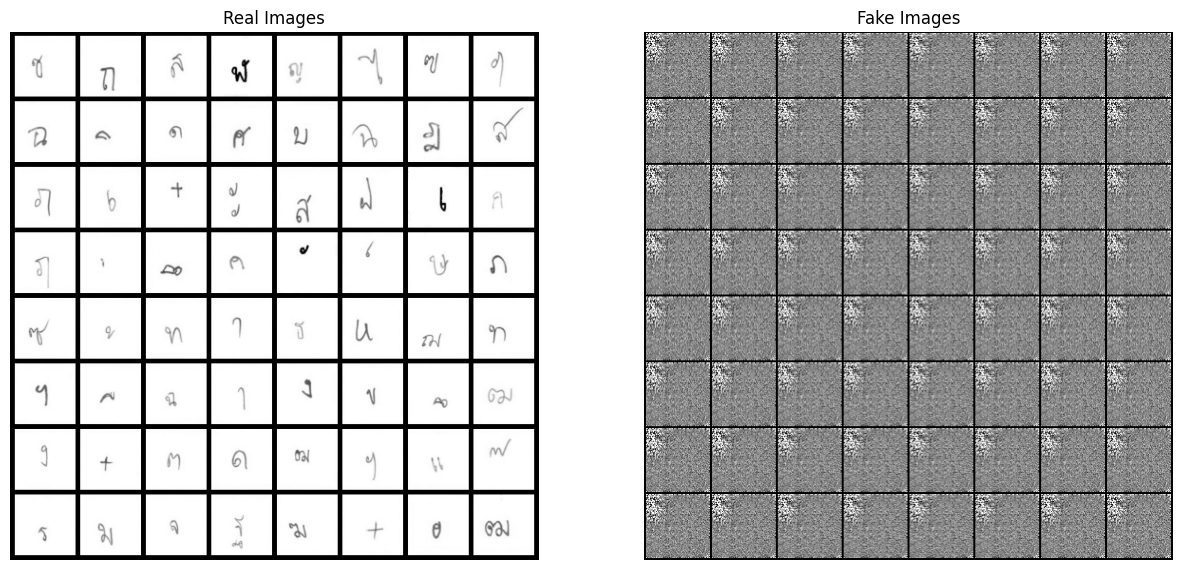

In [55]:
# Grab a batch of real images from the dataloader
import numpy as np
real_batch = next(iter(train_loader))

# Plot the real images
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.axis("off")
plt.title("Real Images")
plt.imshow(np.transpose(make_grid(real_batch[0].to(device)[:64], padding=5, normalize=True).cpu(),(1,2,0)))

# Plot the fake images from the last epoch
plt.subplot(1,2,2)
plt.axis("off")
plt.title("Fake Images")
plt.imshow(np.transpose(img_list[-1],(1,2,0)))
plt.show()

In [61]:
from torchsummary import summary
summary(custom_model.to('cuda'),(1,64,64))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 64, 64]             320
       BatchNorm2d-2           [-1, 32, 64, 64]              64
              ReLU-3           [-1, 32, 64, 64]               0
         MaxPool2d-4           [-1, 32, 32, 32]               0
           Dropout-5           [-1, 32, 32, 32]               0
            Conv2d-6           [-1, 64, 32, 32]          18,496
       BatchNorm2d-7           [-1, 64, 32, 32]             128
              ReLU-8           [-1, 64, 32, 32]               0
         MaxPool2d-9           [-1, 64, 16, 16]               0
          Dropout-10           [-1, 64, 16, 16]               0
           Conv2d-11          [-1, 128, 16, 16]          73,856
      BatchNorm2d-12          [-1, 128, 16, 16]             256
             ReLU-13          [-1, 128, 16, 16]               0
        MaxPool2d-14            [-1, 12